# 1) Fase 2 — Diagnóstico Automatizado: IA no Estetoscópio Digital

Este notebook foi desenvolvido com o objetivo de **simular o funcionamento de um sistema inteligente de triagem médica**.  
A proposta une duas abordagens: a interpretação de sintomas descritos em linguagem natural e a classificação automatizada do nível de risco do paciente.

A partir de frases que reproduzem relatos reais de pacientes, o sistema identifica **sintomas relevantes**, associa esses sintomas a **doenças cardíacas** comuns e na segunda etapa, utiliza técnicas de **aprendizado de máquina** para estimar o risco clínico de cada caso.

O foco é demonstrar, de maneira prática e compreensível, como a Inteligência Artificial pode apoiar o raciocínio clínico em contextos de triagem.

---

### Referências médicas e escopo clínico

As frases e o mapa de sintomas utilizados neste projeto foram elaborados com base em manifestações clínicas associadas às seguintes doenças cardiovasculares:

- **Endocardite**  
- **Insuficiência Cardíaca**  
- **Infarto Agudo do Miocárdio**  
- **Arritmia**  
- **Cardiopatia Congênita**  
- **Hipertensão Arterial**  
- **Miocardite**

Essas condições foram escolhidas por sua relevância na triagem médica, pois exigem atenção rápida e avaliação de risco precisa.  
Para garantir coerência e confiabilidade, as informações foram obtidas em duas referências médicas de excelência:

- **Rede D’Or São Luiz**  
- **Sociedade Beneficente Israelita Brasileira Albert Einstein**

Essas fontes serviram de base para definir os sintomas, termos e relações empregadas nas frases e no mapa de conhecimento (ontologia), assegurando que o conteúdo do projeto reflita situações clínicas realistas e de valor educacional.



# 2) Objetivos

O propósito é demonstrar, de forma prática, como a Inteligência Artificial pode ser aplicada em **processos iniciais de diagnóstico e triagem médica**.  
A proposta une duas abordagens complementares de IA, ambas com foco em transformar dados textuais em conhecimento útil para a tomada de decisão clínica.

---

### Parte 1 — Extração de sintomas e sugestão de diagnóstico

Na primeira etapa, é realizada a **interpretação de frases em linguagem natural** — simulando relatos reais de pacientes.  
Essas frases são comparadas com um **mapa de conhecimento (ontologia)** que associa sintomas a doenças cardíacas.  
O sistema identifica quais sintomas estão presentes em cada relato e sugere o **diagnóstico mais provável**, baseado em correspondências de palavras-chave.

Esta parte representa a **IA baseada em regras**, que utiliza lógica explícita e interpretável para auxiliar a análise de sintomas.

---

### Parte 2 — Classificação de risco com Machine Learning

Na segunda etapa, o projeto utiliza técnicas de **aprendizado de máquina** para treinar um modelo capaz de classificar frases como **“alto risco”** ou **“baixo risco”**.  
Para isso, foi criado um dataset contendo frases simuladas de pacientes e seus respectivos rótulos de risco.  
O modelo aprende, por meio de vetorização de texto com **TF-IDF** e **Regressão Logística**, a reconhecer padrões linguísticos associados à gravidade dos sintomas.

Esta parte representa a **IA baseada em aprendizado estatístico**, permitindo ao sistema generalizar o conhecimento e atuar de forma mais autônoma.

---

### Resultado esperado

Ao final do notebook, o sistema é capaz de:
1. Interpretar frases clínicas em texto livre e identificar sintomas relevantes.  
2. Sugerir possíveis diagnósticos com base em uma ontologia simples.  
3. Classificar automaticamente novos relatos conforme o risco estimado.  

Dessa forma, o projeto simula como **sistemas inteligentes de apoio à triagem** podem ser construídos a partir de dados estruturados e técnicas acessíveis de IA.


# 3) Parte 1 - Sintomas + Diagnóstico (Códigos)

In [ ]:
# Upload dos arquivos (execute e selecione os 3 arquivos)
from google.colab import files
print("Envie os 3 arquivos:")
print("- frases-sintomas.txt")
print("- sintomas_doencas_mapa_completo.csv")
print("- dataset_risco.csv")
uploaded = files.upload()
list(uploaded.keys())


Envie os 3 arquivos:
- frases-sintomas.txt
- sintomas_doencas_mapa_completo.csv
- dataset_risco.csv


Saving dataset_risco.csv to dataset_risco (11).csv
Saving sintomas_doencas_mapa_completo.csv to sintomas_doencas_mapa_completo (15).csv
Saving frases-sintomas.txt to frases-sintomas (13).txt


['dataset_risco (11).csv',
 'sintomas_doencas_mapa_completo (15).csv',
 'frases-sintomas (13).txt']

### Configuração dos caminhos e estrutura de pastas

Definimos os **caminhos dos arquivos** usados no notebook e criamos a pasta de artefatos.  
- `FR_PATH` → frases dos pacientes (`.txt`)  
- `MAP_PATH` → mapa de sintomas e doenças (ontologia, `.csv`)  
- `DATASET_RISCO` → dataset rotulado para ML (`.csv`)  
- `OUT_DIAG` → saída com os diagnósticos sugeridos (Parte 1)  
- `ARTEFATOS_DIR` → modelos e vetores salvos (Parte 2)


In [ ]:
# Código (Caminhos)
from pathlib import Path

FR_PATH = Path('/content/frases-sintomas.txt')
MAP_PATH = Path('/content/sintomas_doencas_mapa_completo.csv')
DATASET_RISCO = Path('/content/dataset_risco.csv')

OUT_DIAG = Path('/content/saida_diagnosticos.csv')
ARTEFATOS_DIR = Path('/content/artifacts_fase2')
ARTEFATOS_DIR.mkdir(parents=True, exist_ok=True)

FR_PATH, MAP_PATH, DATASET_RISCO, OUT_DIAG, ARTEFATOS_DIR


(PosixPath('/content/frases-sintomas.txt'),
 PosixPath('/content/sintomas_doencas_mapa_completo.csv'),
 PosixPath('/content/dataset_risco.csv'),
 PosixPath('/content/saida_diagnosticos.csv'),
 PosixPath('/content/artifacts_fase2'))

### Validação e correção dos arquivos

In [ ]:
# Testar o .txt com as frases
with open(FR_PATH, 'r', encoding='utf-8') as f:
    linhas = [l.strip() for l in f.readlines() if l.strip()]

print(f"Total de frases: {len(linhas)}\n")
for i, frase in enumerate(linhas[:10], 1):
    print(f"{i}. {frase}")


Total de frases: 10

1. Há uma semana comecei a sentir uma febre que não cede, acompanhada de um cansaço extremo que me impede de fazer minhas caminhadas matinais e até de me concentrar no trabalho.
2. Nas últimas semanas, tenho sentido uma falta de ar terrível até para amarrar os sapatos, e percebi que meus tornozelos incham tanto no fim do dia que mal consigo calçar meus chinelos.
3. De repente, senti uma pressão esmagadora no meio do peito, a dor começou a correr pelo meu braço esquerdo e agora estou com um suor frio e mal consigo respirar.
4. De vez em quando, sinto meu coração disparar e bater descompassado, o que me causa uma tontura súbita e uma sensação de cansaço que me impede de continuar minhas tarefas.
5. Tenho notado que meu bebê fica muito suado e cansado durante as mamadas, a ponto de precisar parar várias vezes, e a boquinha e as unhas dele chegam a ficar arroxeadas.
6. Nos últimos dias, tenho tido dores de cabeça muito fortes na nuca, acompanhadas de um zumbido no ouvi

In [ ]:
# Corrigir dataset_risco.csv se necessário
import pandas as pd
from pathlib import Path

# Lê e corrige (separador ; ou , e vírgula extra no final)
texto = Path(DATASET_RISCO).read_text(encoding='utf-8', errors='ignore').splitlines()
rows = []
header_seen = False
for i, line in enumerate(texto):
    if i == 0 and ('frase' in line and 'situacao' in line):
        header_seen = True
        continue
    # separa pela última ocorrência do separador
    if ';' in line:
        parts = line.rsplit(';', 1)
    else:
        parts = line.rsplit(',', 1)
    if len(parts) == 2:
        rows.append((parts[0].strip(), parts[1].strip()))

df_risco = pd.DataFrame(rows, columns=['frase','situacao'])
df_risco.to_csv(DATASET_RISCO, index=False, encoding='utf-8')

print("dataset_risco.csv OK:", df_risco.shape)
df_risco.head()


dataset_risco.csv OK: (18, 2)


,frase,situacao
0,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...",alto risco
1,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...",baixo risco
2,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...",alto risco
3,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...",baixo risco
4,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...",alto risco


In [ ]:
# Corrigir sintomas_doencas_mapa_completo.csv se necessário
# Normaliza o mapa para 3 colunas: Sintoma_1, Sintoma_2, Doenca_Associada
raw = Path(MAP_PATH).read_text(encoding='utf-8', errors='ignore').splitlines()
rows = []
for i, line in enumerate(raw):
    if i == 0 and ('Sintoma' in line and 'Doenca' in line or 'Doença' in line):
        continue
    # tenta ; senão ,
    parts = line.split(';') if ';' in line else line.split(',')
    if len(parts) >= 3:
        s1, s2, dz = parts[0].strip(), parts[1].strip(), parts[2].strip()
        rows.append((s1, s2, dz))

import pandas as pd
mapa = pd.DataFrame(rows, columns=['Sintoma_1','Sintoma_2','Doenca_Associada'])
mapa.to_csv(MAP_PATH, index=False, encoding='utf-8')

print("Mapa OK:", mapa.shape)
mapa.head()


Mapa OK: (299, 3)


,Sintoma_1,Sintoma_2,Doenca_Associada
0,Febre,Fadiga,Endocardite
1,Febre,Dor nos músculos,Endocardite
2,Febre,Sudorese noturna,Endocardite
3,Febre,Respiração curta,Endocardite
4,Febre,Palidez,Endocardite


### Extração de sintomas e sugestão de diagnóstico (regras + ontologia)

Esta seção lê o `.txt` com os relatos, identifica sintomas por palavras-chave e sugere um possível diagnóstico com base no mapa de conhecimento (.csv).  
A saída traz `sintomas_encontrados`, `score` (número de sintomas casados) e `diagnostico_sugerido`.


In [ ]:
# Parte 1 — Extração + Diagnóstico (funções + execução)

import re, unicodedata, pandas as pd
from pathlib import Path

# --- utilitários ---
def strip_accents(s: str) -> str:
    s = unicodedata.normalize('NFD', str(s))
    return ''.join(ch for ch in s if unicodedata.category(ch) != 'Mn')

def norm(s: str) -> str:
    s = strip_accents(str(s).lower().strip())
    return re.sub(r'\s+', ' ', s)

def load_frases(path: Path):
    linhas = [ln.strip() for ln in open(path, 'r', encoding='utf-8') if ln.strip()]
    frases = []
    for i, ln in enumerate(linhas, 1):
        if ln.lower().startswith('paciente') and ':' in ln:
            pid, texto = ln.split(':', 1)
            frases.append((pid.strip(), texto.strip()))
        else:
            frases.append((f'Paciente {i}', ln))
    return frases

def detect_columns(df_map: pd.DataFrame):
    # identifica coluna de doença
    disease_col = None
    for c in df_map.columns:
        if any(k in c.lower() for k in ['doen','diagn','condi']):
            disease_col = c; break
    if disease_col is None:
        for c in df_map.columns:
            if c.lower().strip() in ('doença associada','doenca associada','doenca','diagnostico'):
                disease_col = c; break
    # identifica colunas de sintomas
    sym_cols = [c for c in df_map.columns if 'sintoma' in c.lower()]
    if not sym_cols:
        sym_cols = [c for c in df_map.columns if c != disease_col][:2]
    return disease_col, sym_cols

def split_syn(cell: str):
    # aceita sinônimos separados por ; , / |
    return [p.strip() for p in re.split(r'[;,/|]', str(cell)) if p.strip()]

def match_sentence(frase: str, row: pd.Series, sym_cols):
    texto = norm(frase)
    encontrados = []
    for sc in sym_cols:
        for syn in split_syn(row.get(sc, '')):
            if norm(syn) in texto:
                encontrados.append(syn)
    # remove duplicados mantendo ordem
    encontrados = list(dict.fromkeys(encontrados))
    return len(encontrados), encontrados

# --- execução ---
frases = load_frases(FR_PATH)                    # FR_PATH definido nas células anteriores
mapa = pd.read_csv(MAP_PATH)                     # MAP_PATH idem
disease_col, sym_cols = detect_columns(mapa)

resultados = []
for pid, frase in frases:
    melhor = None
    for _, row in mapa.iterrows():
        score, termos = match_sentence(frase, row, sym_cols)
        if score > 0:
            cand = {'doenca': row[disease_col], 'score': score, 'termos': termos}
            if (melhor is None or cand['score'] > melhor['score'] or
                (melhor and cand['score'] == melhor['score'] and len(cand['termos']) > len(melhor['termos']))):
                melhor = cand
    resultados.append({
        'paciente': pid,
        'frase': frase,
        'sintomas_encontrados': ', '.join(melhor['termos']) if melhor else '',
        'score': melhor['score'] if melhor else 0,
        'diagnostico_sugerido': melhor['doenca'] if melhor else ''
    })

df_diag = pd.DataFrame(resultados)
df_diag.to_csv(OUT_DIAG, index=False, encoding='utf-8')   # OUT_DIAG definido antes
print("Arquivo salvo em:", OUT_DIAG)
df_diag


Arquivo salvo em: /content/saida_diagnosticos.csv


,paciente,frase,sintomas_encontrados,score,diagnostico_sugerido
0,Paciente 1,Há uma semana comecei a sentir uma febre que n...,Febre,1,Endocardite
1,Paciente 2,"Nas últimas semanas, tenho sentido uma falta d...",Falta de ar,1,Insuficiência Cardíaca
2,Paciente 3,"De repente, senti uma pressão esmagadora no me...",Suor frio,1,Arritmia
3,Paciente 4,"De vez em quando, sinto meu coração disparar e...",Tontura,1,Hipertensão Arterial
4,Paciente 5,Tenho notado que meu bebê fica muito suado e c...,,0,
5,Paciente 6,"Nos últimos dias, tenho tido dores de cabeça m...","Tontura, Zumbido no ouvido",2,Hipertensão Arterial
6,Paciente 7,"Depois de uma gripe forte, comecei a sentir um...","Dor no peito, Falta de ar",2,Miocardite
7,Paciente 8,"Há algumas semanas, tenho acordado no meio da ...",Calafrios,1,Endocardite
8,Paciente 9,Começou com uma dor estranha na mandíbula que ...,,0,
9,Paciente 10,"De repente, meu nariz começou a sangrar sem pa...",,0,


# 4) Parte 2 - Classificador Básico de Texto (Códigos)


## Leitura e Limpeza do Dataset

In [ ]:
# Importação

import pandas as pd
from pathlib import Path

# Caminhos
try:
    DATASET_RISCO
except NameError:
    DATASET_RISCO = Path('/content/dataset_risco.csv')

try:
    ARTEFATOS_DIR
except NameError:
    ARTEFATOS_DIR = Path('/content/artifacts_fase2')
ARTEFATOS_DIR.mkdir(parents=True, exist_ok=True)

# Leitura e Limpeza ds dados
df = pd.read_csv(DATASET_RISCO, encoding='utf-8')
df.columns = df.columns.str.strip().str.replace('"', '')
df['frase'] = df['frase'].astype(str).str.strip().str.replace('"', '')
df['situacao'] = df['situacao'].astype(str).str.strip().str.replace('"', '')

print("✅ Dados carregados e limpos.")
display(df.head())
print("Classes:", df['situacao'].unique())





✅ Dados carregados e limpos.


,frase,situacao
0,sinto dor no peito e falta de ar ao esforço,alto risco
1,tive um leve incômodo nas costas após trabalhar,baixo risco
2,palpitações fortes acompanhadas de tontura,alto risco
3,dor leve de cabeça sem outros sintomas,baixo risco
4,aperto no peito e suor frio ao caminhar,alto risco


Classes: ['alto risco' 'baixo risco']


### Divisão dos dados e configuração dos modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Divide o conjunto de dados (70% treino / 30% teste)
X, y = df['frase'], df['situacao']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Define o vetor TF-IDF e os modelos que serão testados
modelos = {
    "LinearSVC": Pipeline([
        ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=3000)),
        ("clf", LinearSVC())
    ]),
    "LogisticRegression": Pipeline([
        ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=3000)),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]),
    "MultinomialNB": Pipeline([
        ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=3000)),
        ("clf", MultinomialNB(alpha=0.7))
    ]),
}

print("✅ Modelos configurados com sucesso:")
for nome in modelos.keys():
    print("-", nome)


✅ Modelos configurados com sucesso:
- LinearSVC
- LogisticRegression
- MultinomialNB


### Avaliação dos modelos com validação cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Configura a validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avalia cada modelo com base na acurácia média
resultados = {}
for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=cv, scoring="accuracy")
    resultados[nome] = (scores.mean(), scores.std())
    print(f"{nome}: {scores.mean():.2f} ± {scores.std():.2f}")

# Seleciona o melhor desempenho
melhor_modelo = max(resultados, key=lambda k: resultados[k][0])
modelo_final = modelos[melhor_modelo].fit(X_train, y_train)

print(f"\nMelhor modelo: {melhor_modelo}")


LinearSVC: 0.77 ± 0.20
LogisticRegression: 0.77 ± 0.20
MultinomialNB: 0.87 ± 0.16

Melhor modelo: MultinomialNB


### Teste final e visualização dos resultados

✅ Acurácia final: 0.83



,classe,precision,recall,f1-score,support
0,alto risco,1.00,0.67,0.80,3.00
1,baixo risco,0.75,1.00,0.86,3.00
2,accuracy,0.83,0.83,0.83,0.83
3,macro avg,0.88,0.83,0.83,6.00
4,weighted avg,0.88,0.83,0.83,6.00


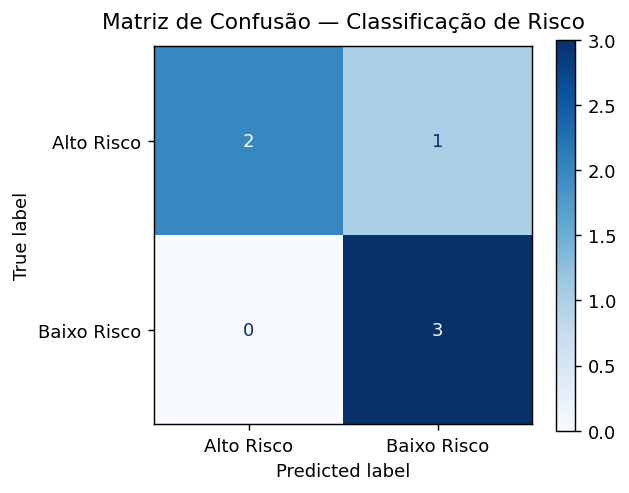

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Faz as previsões no conjunto de teste
y_pred = modelo_final.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)

print(f"✅ Acurácia final: {acuracia:.2f}\n")

# Relatório de métricas (precision, recall, f1-score)
relatorio = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
relatorio_df = (pd.DataFrame(relatorio)
                .transpose()
                .rename_axis("classe")
                .reset_index())[["classe","precision","recall","f1-score","support"]]
display(relatorio_df.round(2))

# Matriz de confusão
plt.rcParams["figure.dpi"] = 130
fig, ax = plt.subplots(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=["Alto Risco","Baixo Risco"],
    cmap="Blues", values_format="d", ax=ax
)
ax.set_title("Matriz de Confusão — Classificação de Risco", fontsize=12, pad=10)
fig.tight_layout()
plt.show()


### Salvando o modelo treinado

In [ ]:
from joblib import dump
from pathlib import Path

ARTEFATOS_DIR.mkdir(parents=True, exist_ok=True)
caminho_modelo = ARTEFATOS_DIR / "classificador_risco.joblib"
dump(modelo_final, caminho_modelo)

print("📁 Modelo salvo com sucesso em:")
print(caminho_modelo)


📁 Modelo salvo com sucesso em:
/content/artifacts_fase2/classificador_risco.joblib



# Conclusão — Resultados
Este trabalho demonstrou como a **IA** pode apoiar a **triagem médica automatizada**.  
Por meio da interpretação de frases clínicas e da classificação de risco, o sistema conseguiu identificar sintomas e estimar o risco de forma precisa.

O modelo final atingiu uma **acurácia de 83%**, mostrando desempenho consistente entre as classes de “alto risco” e “baixo risco”.  
Esse resultado mostra o potencial do uso de **PLN** e **aprendizado de máquina** em contextos clínicos, permitindo criar ferramentas que auxiliam profissionais de saúde na análise de sintomas e priorização de pacientes.


---
